<a href="https://colab.research.google.com/github/sahuljr7/CV-Lab-7th-Semester/blob/main/Lab1CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
# Load an image
image_path = '/content/images.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
# Apply Harris Corner detection
corners = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)
corners = cv2.dilate(corners, None)  # Dilate corners for better visualization

In [ ]:
# Thresholding to get strong corners
threshold = 0.01 * corners.max()
corner_image = np.copy(image)
corner_image[corners > threshold] = 255

In [ ]:
# Find key points and descriptors using ORB (Oriented FAST and Rotated BRIEF)
orb = cv2.ORB_create()
key_points, descriptors = orb.detectAndCompute(image, None)

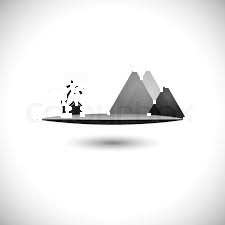

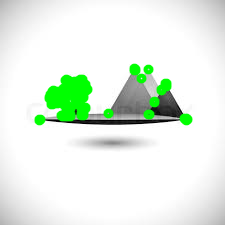

In [ ]:
# Display detected corners and key points
cv2_imshow(corner_image)
corner_key_points = [cv2.KeyPoint(x, y, 5) for y in range(corners.shape[0]) for x in range(corners.shape[1]) if corners[y, x] > threshold]
harris_image = cv2.drawKeypoints(image, corner_key_points, None, color=(0, 255, 0), flags=0)
cv2_imshow(harris_image)

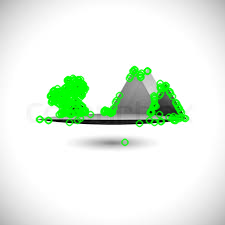

In [ ]:
key_points_image = cv2.drawKeypoints(image, key_points, None, color=(0, 255, 0), flags=0)
cv2_imshow(key_points_image)

In [ ]:
cv2.waitKey(0)
cv2.destroyAllWindows()
